# Breast Cancer Classification

## INTRODUCTION: 


Nowadays breast cancer is a most common cancer happend in women in the world. Breast cancer is a malignant cell growth out of control in the breast. The cancer will spread to other areas of the body if it is undetected and left untreated. In the past years, breast cancer ranks second among cancer deaths in women. Early diagnosis significantly increases the chances of suviver. The key of experimenting is to classify tumors into malignant(cancer) or benign(not cancer). 

## GOAL: 

The goal of notebook is to predict whether the cancer is malignant or benign by using some machine learning models. Thus, this will help in finding and doing research of the attributes thereby helping in predicting the stage of breast cancer on the data of attributes.

In [22]:
# Import libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# to build models
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import LocalOutlierFactor
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

SEED = 204

tf.random.set_seed(SEED)
np.random.seed(SEED)

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")

## Attribute Information:
1. ID number 
2. Diagnosis (M = malignant, B = benign)
3. Radius: mean of distances from center to points on the perimeter 
4. Texture: standard deviation of gray-scale values
5. Perimeter
6. Area
7. Smoothness: local variation in radius length 
8. Compactness: (perimeter^2 / area - 1.0)
9. Concavity: The severity of concave portions of the contour.
10. Concave point: number of concave portions of the contour 
11. Symmetry
12. Fractal dimension: "coastline approximation" - 1

**Check the target variables:**
* Malignant = 1 indicating presence of cancer cells
* Benign = 0 indicating no detection of cancer cells 

In [2]:
# import dataset

data = pd.read_csv("data.csv")
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [3]:
data.drop(["Unnamed: 32", "id"], inplace = True, axis = 1)

data.rename(columns = {"diagnosis": "target"}, inplace = True)

data.head(10)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


Since the target column contains strings, I will convert strings to integers where I will use list comprehension method

In [4]:
data["target"] = [1 if i.strip() == 'M' else 0 for i in data["target"]]

data.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
col = data.columns
print(col)

Index(['target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
data.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Explartory Data Analysis (EDA)

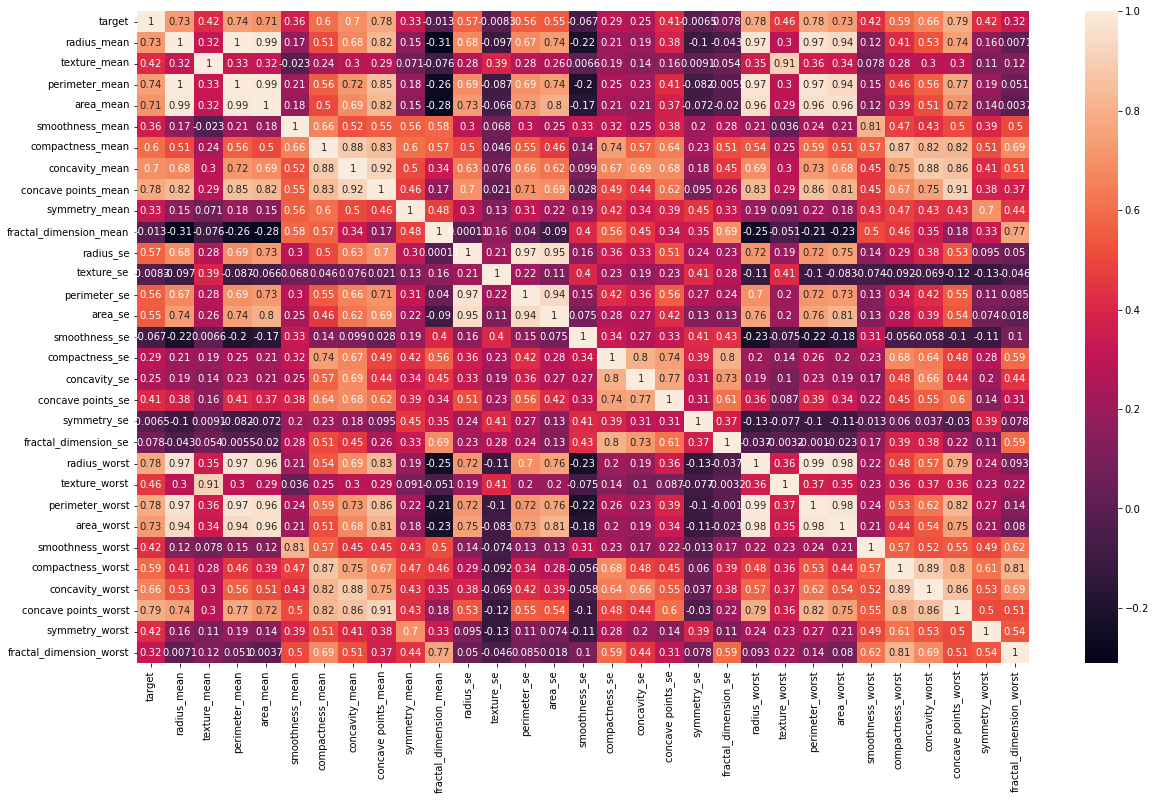

In [37]:
corr = data.corr()
plt.figure (figsize = (20,12))
sns.heatmap(corr, annot = True)
plt.show()

As you can see above diagram, you can see that the corr matrix is quite complicated and it is hard for us to see by looking at this. We will create a focused correlation matrix.

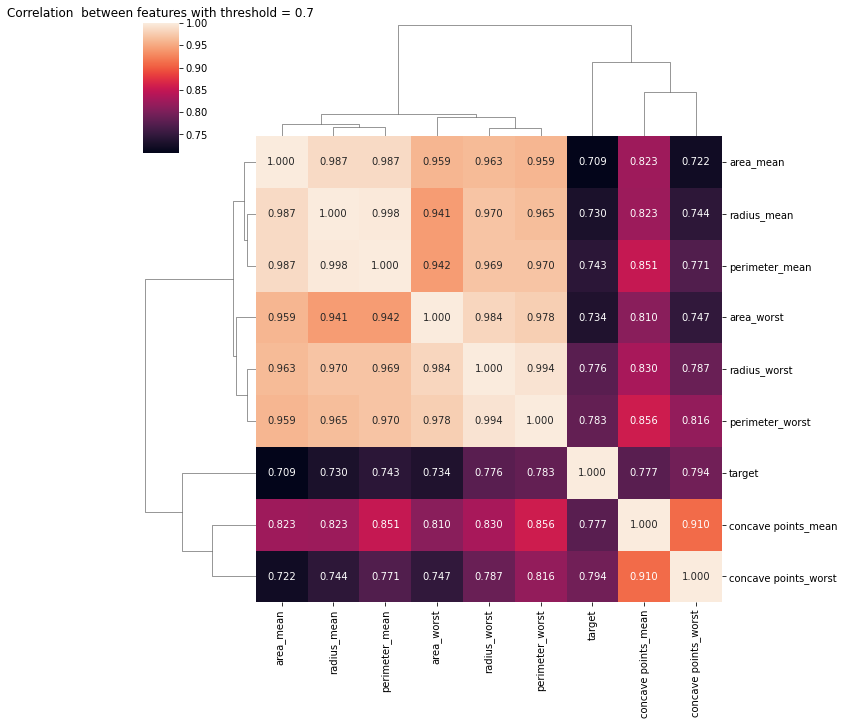

In [9]:
# focused correlation matrix 

threshold = 0.7

filt = np.abs(corr['target']) > threshold 
corr_features = corr.columns[filt].tolist()

sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".3f")
plt.title("Correlation  between features with threshold = 0.7")
plt.show()

<AxesSubplot:xlabel='count', ylabel='target'>

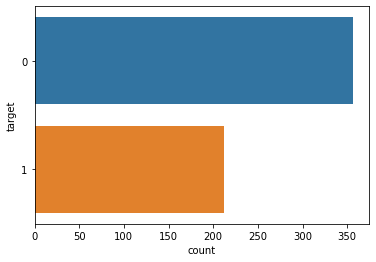

In [10]:
# Check distribution of classes in target

sns.countplot(data = data, y = "target")

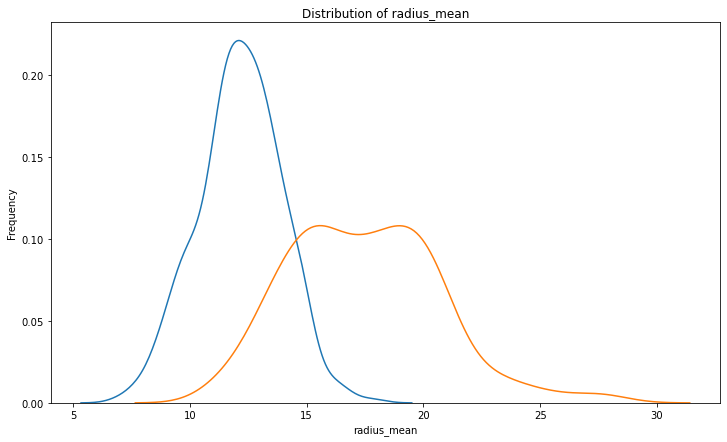

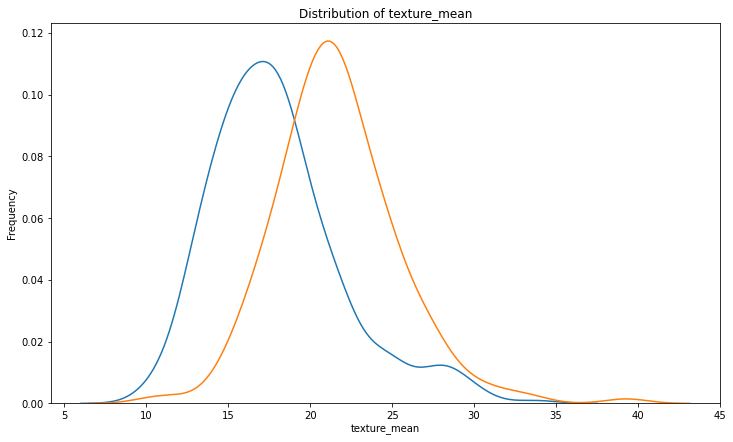

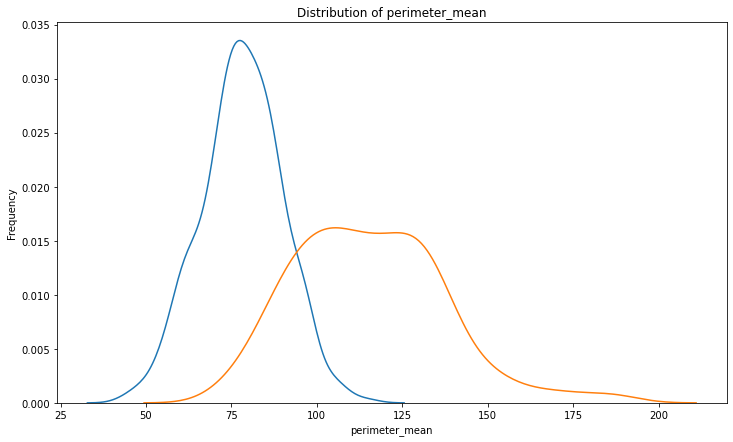

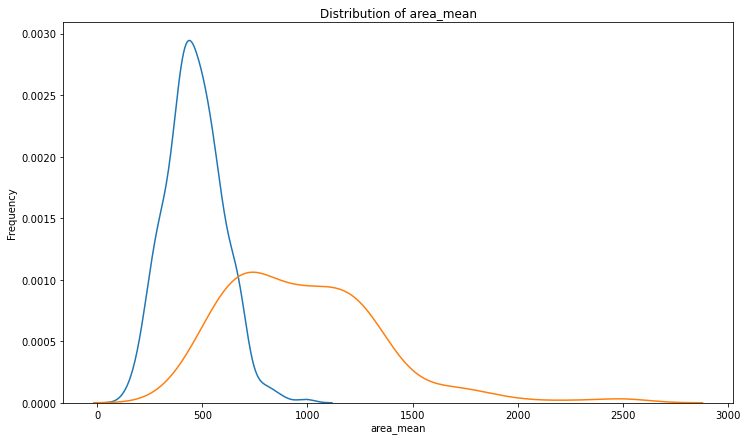

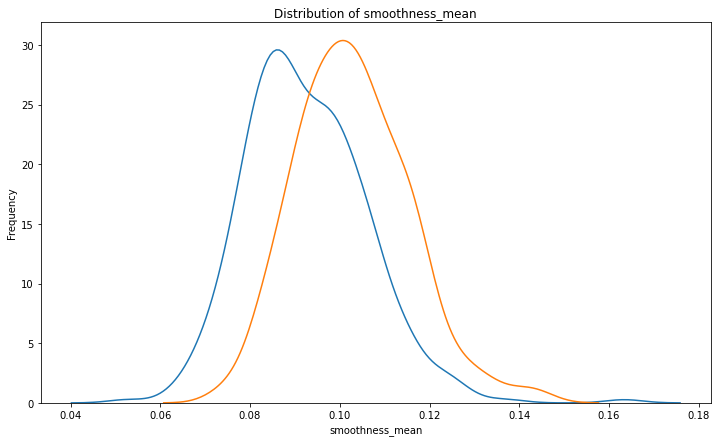

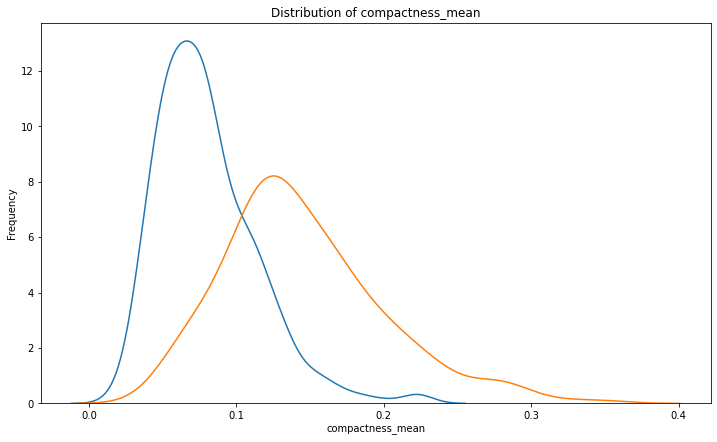

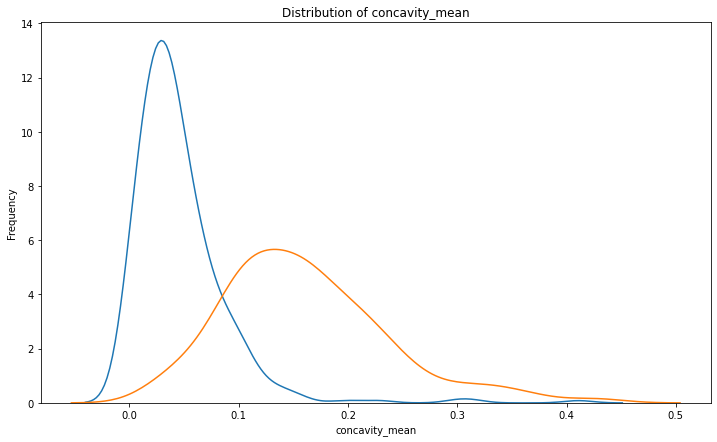

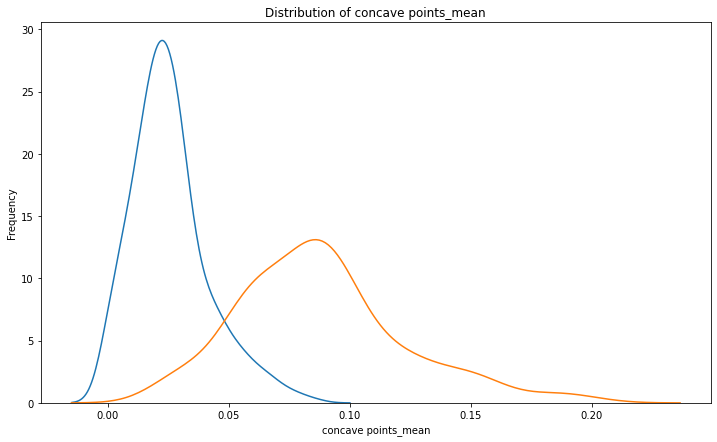

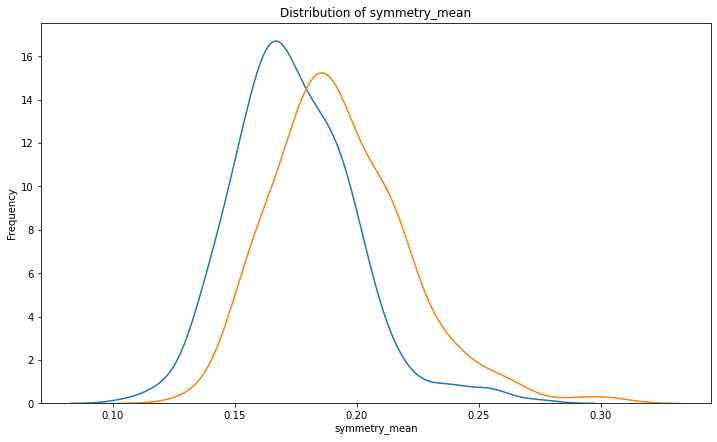

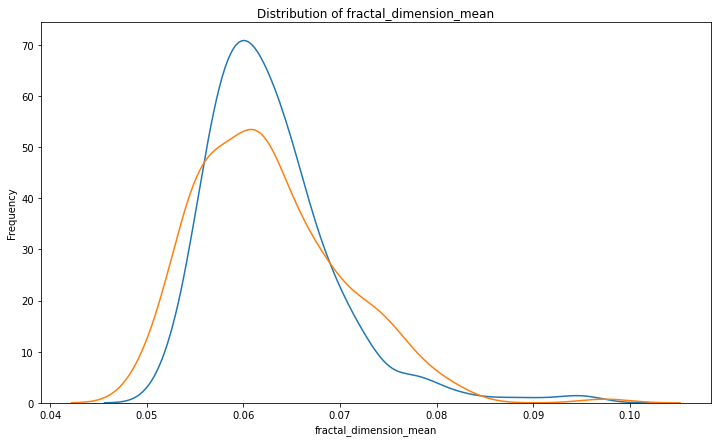

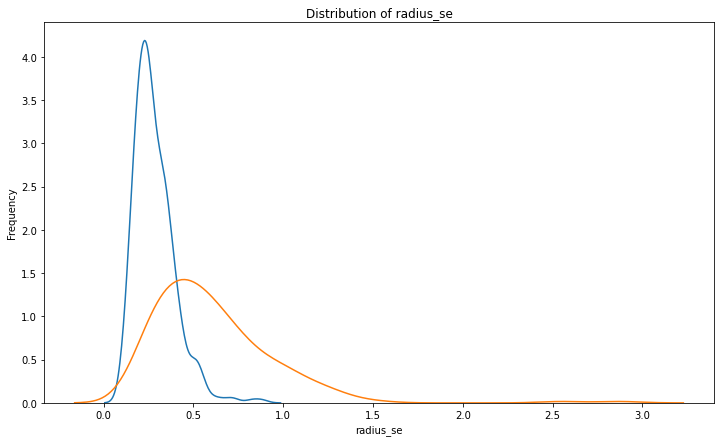

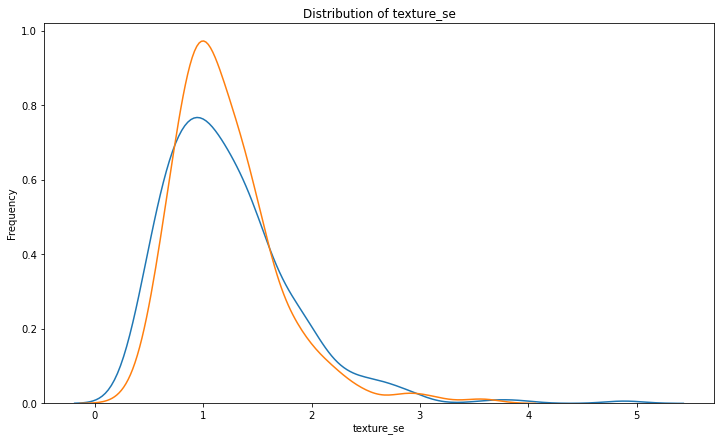

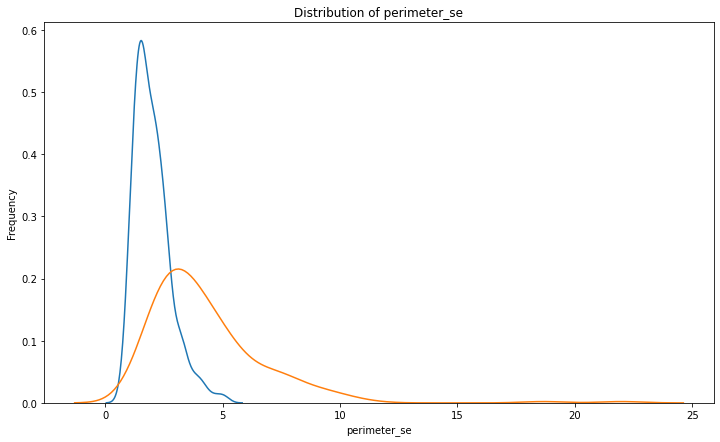

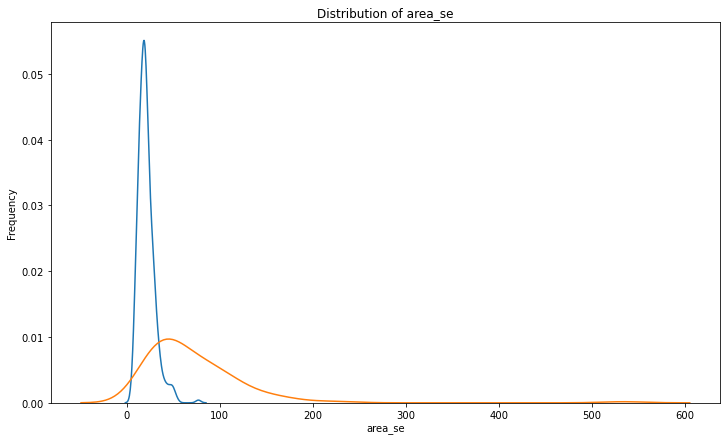

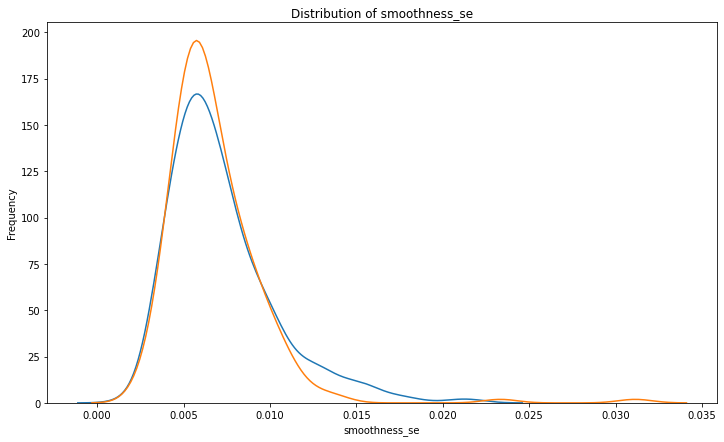

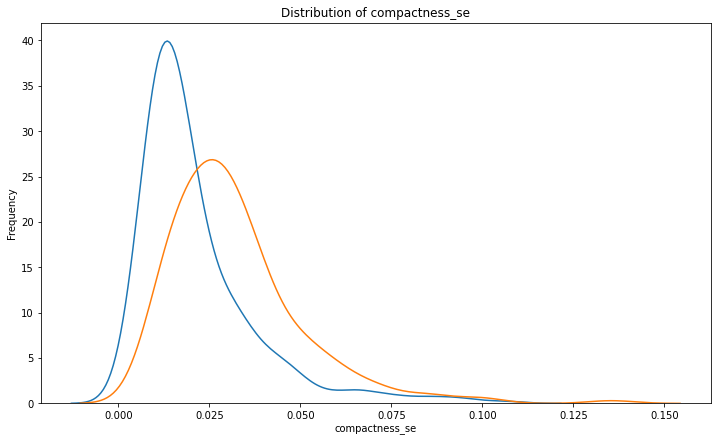

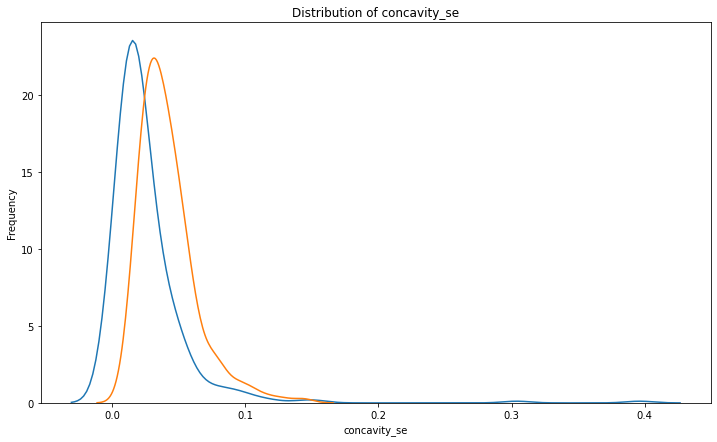

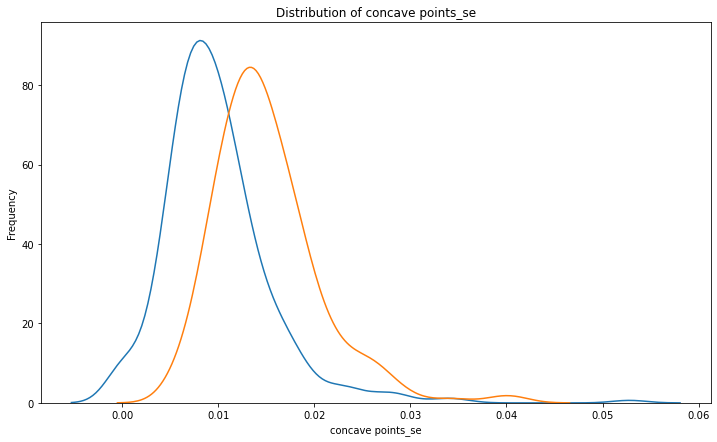

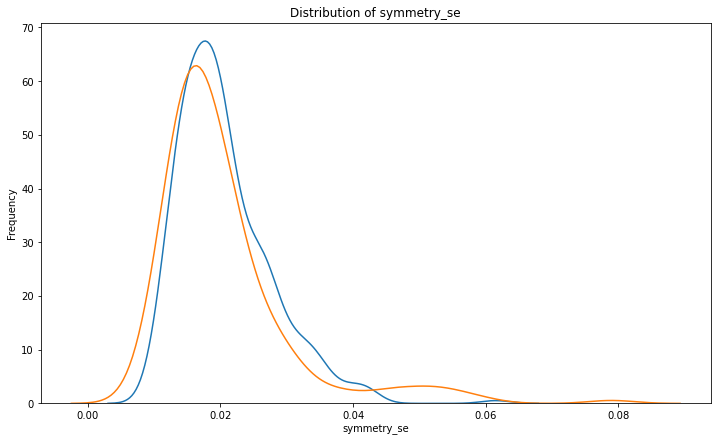

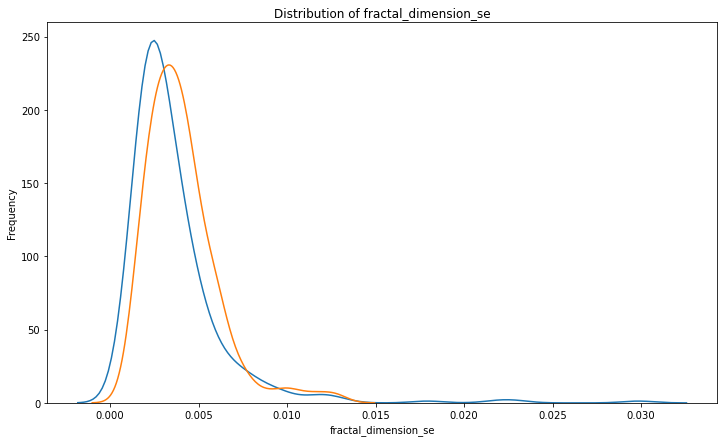

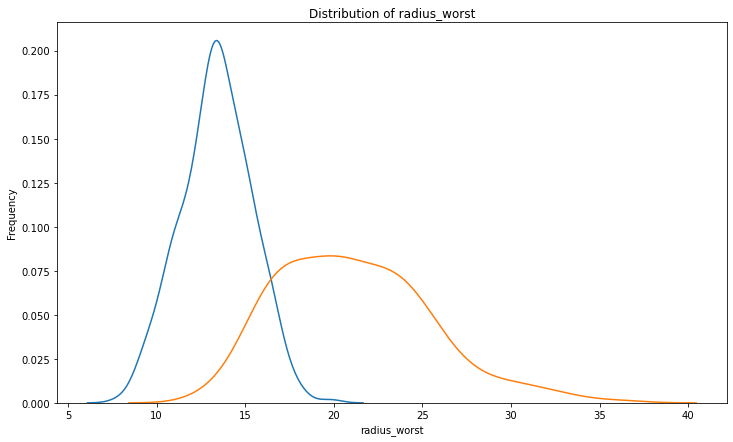

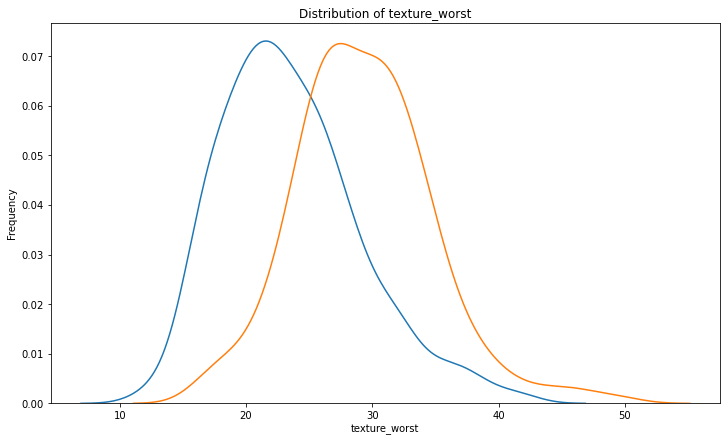

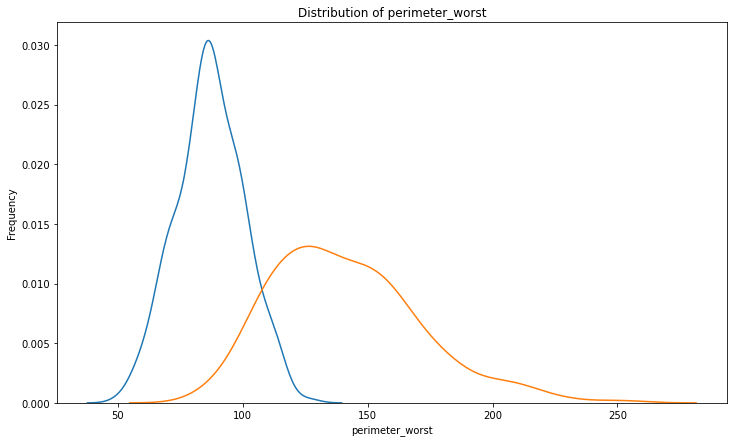

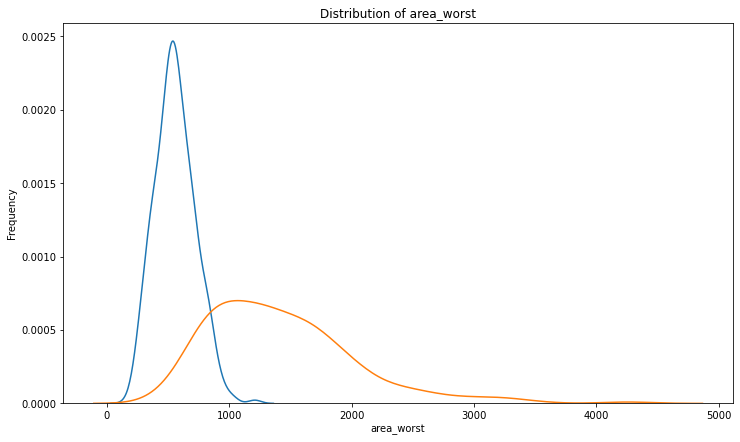

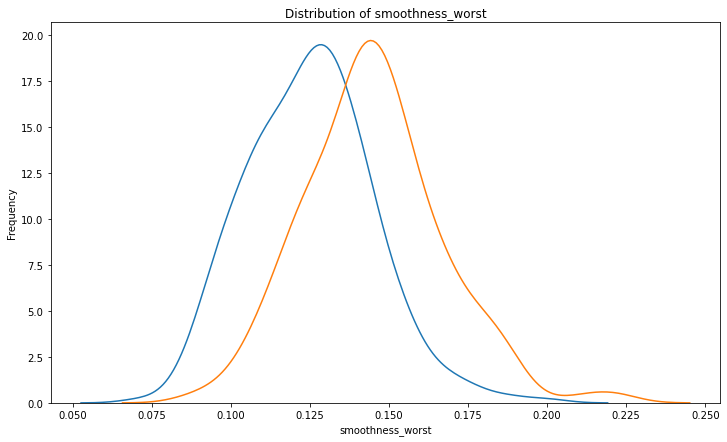

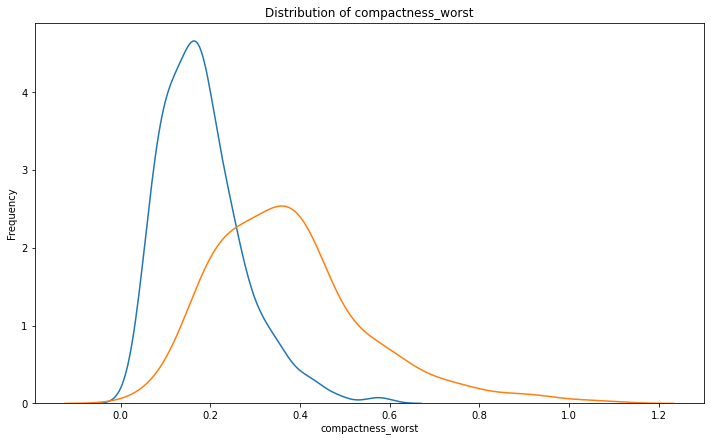

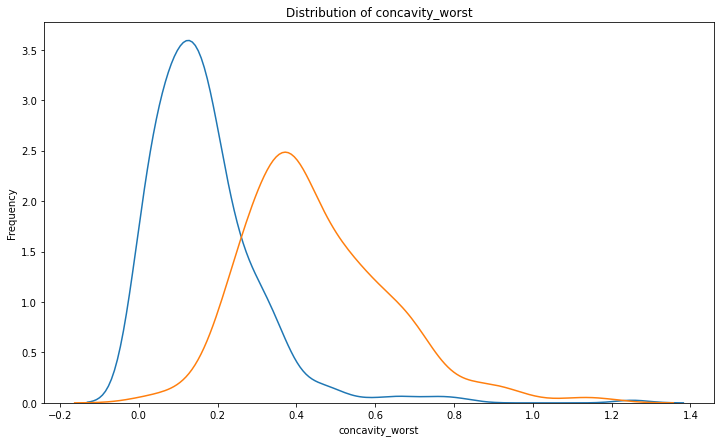

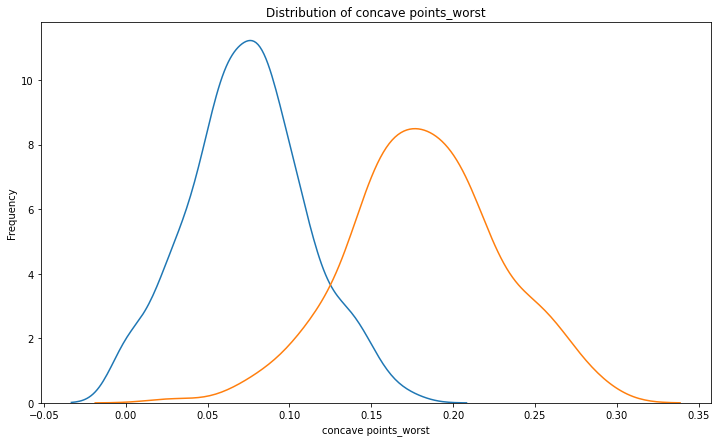

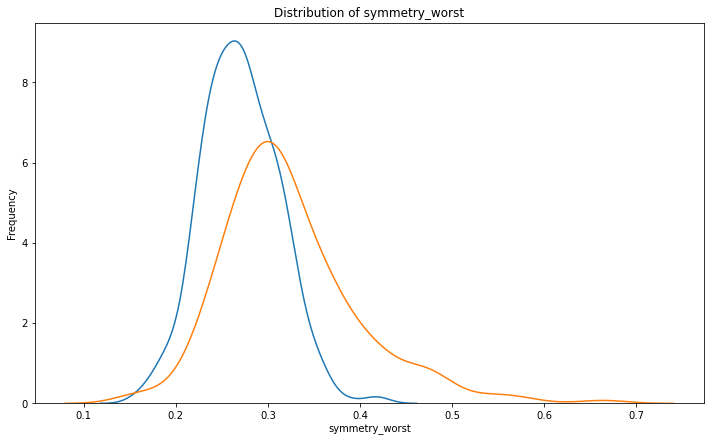

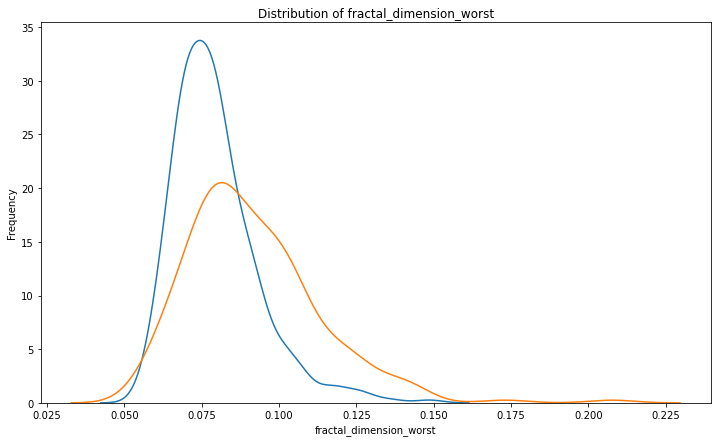

In [11]:
X = data.drop(["target"], axis = 1)
y = data["target"]

for col in X: 
    plt.figure(figsize =(12,7))
    column_data = X[col]
    sns.kdeplot(column_data[y == 0], label = "B")
    sns.kdeplot(column_data[y == 1], label = "M")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title ('Distribution of {}'.format(col))
    

#### When we see the above graphs, some of them have positive skewness. Therefore, we need to select an outlier detection method.

### Outlier Detection

To deal with only necessary data, the outliers need to be gotten rid of. Since the dataset has skewed data, using Local Outlier Factor (LOF) as the outlier detection method will be appropriate.

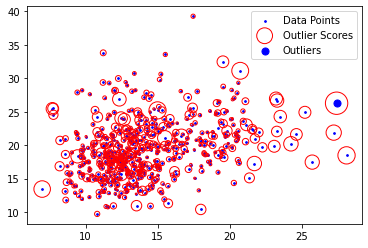

In [36]:
## outlier detection 

y = data["target"]
X = data.drop(["target"], axis = 1)

clf = LocalOutlierFactor(n_neighbors = 20)
clf.fit_predict(X)
X_score = clf.negative_outlier_factor_

outlier_score = pd.DataFrame()
outlier_score["score"] = X_score 

threshold = -2.5
filt = outlier_score["score"] < threshold
outlier_index = outlier_score[filt].index.tolist()

radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())
outlier_index = outlier_score[filt].index.tolist()

radius = (X_score.max() - X_score) /(X_score.max() - X_score.min())
outlier_score["radius"] = radius


plt.scatter(X.iloc[:,0], X.iloc[:,1],color = 'b', s= 3, label = "Data Points")
plt.scatter (X.iloc[:,0], X.iloc[:,1], s = 500* radius, edgecolors = 'r', facecolors ="none", label = "Outlier Scores")
plt.scatter(X.iloc[outlier_index, 0], X.iloc[outlier_index,1], color = "b", s = 50, label = "Outliers")
plt.legend()

plt.show()

We detected the outliers by using the method of LOF. According to the LOF, the data whose negative outlier factor is less than -1 is an outlier. We used threshold value of -2.5 instead of -1 in order to prevent the loss of data. Now we will drop the outliers from the dataset

In [13]:
# drop outliers

X = X.drop(outlier_index)
y = y.drop(outlier_index).values

## Train and Test Dataset

Now, we will assign values to our "X" and "y" values, we will split dataset into training and testing data where training data is the subset of data used to train our model and testing data is the subset of data that the model has not seen before used to test the performance of our model.

In [14]:
## Creating the train and test split
## We will split our data using 70% for training and remaining 30% for testing

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [39]:
print ("Training data test:", X_train.shape)
print ("Testing data test:", X_test.shape)
print ("Training data test:", y_train.shape)
print ("Testing data test:", y_test.shape)

Training data test: (397, 30)
Testing data test: (171, 30)
Training data test: (397,)
Testing data test: (171,)


### Standardization

We can see that our magnitude difference between our dataset is very large. So it means that some data can dominate other data. We will minimise and avoid this issue by decreasing the maginitude difference. We will use Standard Scaler and Label Encoder

In [16]:
## Standard Scaler 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
## Label Encoder 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['target'] = le.fit_transform(data['target'])

### Principal Component Analysis (PCA)

- Principal Component Analysis (PCA) is a linear-dimensionality reduction technique that can be utilized for extracting information from a high-dimensional datasets to low-dimensional subdataset by reducing a large number of features to a couple of principal components.  
- To avoid overfitting problem, we will reduce the complexity of dataset by applying the method of PCA. 

In [18]:
# Create a pipeline 
pipeline = make_pipeline(StandardScaler(), PCA(n_components = 2))

# fit the pipeline to the training data 
training_pipe = pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
test_pipe = pipeline.score(X_test, y_test)


#### It is preferable to train our machine learning model on a balanced dataset, so our machine learning model will not bias towards the majority data. Hence, we use SMOTE to do some statistical unsample. 

In [23]:
sm = SMOTE(sampling_strategy ="auto", random_state = SEED)
X, y = sm.fit_resample(X_train, y_train)

print ("Training data (SMOTE)", {0: 1.0-sum(y)/len(y),1 : sum(y)/len(y)})

Training data (SMOTE) {0: 0.5, 1: 0.5}


## Classification using Tensorflow

- We will set up the model. The first line of code for the Sequential constructor. We use the sequence model because our network consists linear stack of layers. Next, we add layers to the model.  


### Why did I choose Dropout to be 0.2 not 0.5? 
* If our model is small, low dropout rate will work better.
* If the network is large, hence 0.5 will work well as the model will be more prone to overfit

In [25]:
# Initialize the ANN
model = tf.keras.models.Sequential()
# Add the input layer and the first hidden layer
model.add(tf.keras.layers.Dense(units = 24,kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
model.add(tf.keras.layers.Dropout(0.2))
#Add the input layer and the second hidden layer
model.add(tf.keras.layers.Dense(units = 12,kernel_initializer = 'uniform', activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
# Add the input layer and the third hidden layer
model.add(tf.keras.layers.Dense(units = 6, kernel_initializer = "uniform", activation = 'relu'))
#Add the output layer 
model.add(tf.keras.layers.Dense(units = 1,kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compile the ANN
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.1),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
        tf.keras.metrics.Precision(name = 'precision'),
        tf.keras.metrics.Recall(name = 'recall')
    ]
)

history = model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 100)


2023-03-11 14:14:11.608223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
13/13 [==============================] - 2s 61ms/step - loss: 0.5668 - accuracy: 0.7783 - precision: 0.7047 - recall: 0.7047 - val_loss: 0.1171 - val_accuracy: 0.9532 - val_precision: 0.9355 - val_recall: 0.9355
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1268 - accuracy: 0.9572 - precision: 0.9521 - recall: 0.9329 - val_loss: 0.0678 - val_accuracy: 0.9825 - val_precision: 0.9836 - val_recall: 0.9677
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1230 - accuracy: 0.9521 - precision: 0.9514 - recall: 0.9195 - val_loss: 0.0978 - val_accuracy: 0.9825 - val_precision: 1.0000 - val_recall: 0.9516
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1505 - accuracy: 0.9622 - precision: 0.9467 - recall: 0.9530 - val_loss: 0.1007 - val_accuracy: 0.9649 - val_precision: 0.9375 - val_recall: 0.9677
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1347 - accuracy: 0.9723 - precis

Epoch 38/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0665 - accuracy: 0.9849 - precision: 0.9931 - recall: 0.9664 - val_loss: 0.1932 - val_accuracy: 0.9649 - val_precision: 0.9516 - val_recall: 0.9516
Epoch 39/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9824 - precision: 0.9931 - recall: 0.9597 - val_loss: 0.0871 - val_accuracy: 0.9766 - val_precision: 1.0000 - val_recall: 0.9355
Epoch 40/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9824 - precision: 0.9931 - recall: 0.9597 - val_loss: 0.1015 - val_accuracy: 0.9766 - val_precision: 0.9833 - val_recall: 0.9516
Epoch 41/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9824 - precision: 0.9797 - recall: 0.9732 - val_loss: 0.0938 - val_accuracy: 0.9766 - val_precision: 1.0000 - val_recall: 0.9355
Epoch 42/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.9874 - pr

13/13 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9924 - precision: 1.0000 - recall: 0.9799 - val_loss: 0.3905 - val_accuracy: 0.9766 - val_precision: 1.0000 - val_recall: 0.9355
Epoch 75/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1688 - accuracy: 0.9849 - precision: 0.9799 - recall: 0.9799 - val_loss: 0.2627 - val_accuracy: 0.9591 - val_precision: 0.9365 - val_recall: 0.9516
Epoch 76/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4848 - accuracy: 0.9068 - precision: 0.8111 - recall: 0.9799 - val_loss: 0.1453 - val_accuracy: 0.9649 - val_precision: 0.9516 - val_recall: 0.9516
Epoch 77/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9824 - precision: 0.9797 - recall: 0.9732 - val_loss: 0.1757 - val_accuracy: 0.9532 - val_precision: 0.9219 - val_recall: 0.9516
Epoch 78/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9849 - precision: 0.98

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                744       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,129
Trainable params: 1,129
Non-trainabl

### Evaluation and visualize results

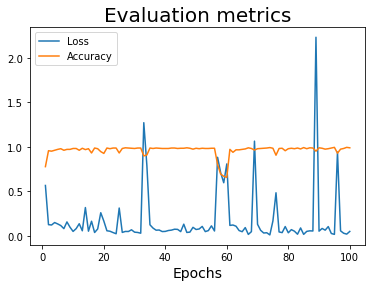

In [27]:
plt.plot(
    np.arange(1,101),
    history.history['loss'], label = 'Loss')
    
plt.plot(
    np.arange(1,101),
    history.history['accuracy'], label = 'Accuracy')

plt.title('Evaluation metrics', size = 20)
plt.xlabel ('Epochs', size = 14)
plt.legend()

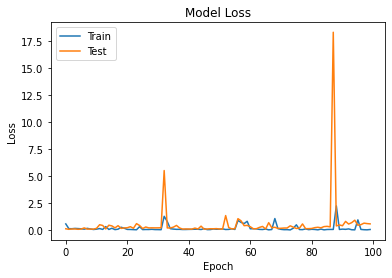

In [28]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

In [29]:
pred_train = model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose = 0)
print ('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))

pred_test = model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

13/13 [==============================] - 0s 946us/step
Accuracy on training data: 0.997481107711792% 
 Error on training data: 0.002518892288208008
6/6 [==============================] - 0s 1ms/step
Accuracy on test data: 0.9707602262496948% 
 Error on test data: 0.029239773750305176


**Evaluation of model performance: The output above shows the performance of the model on both training and test data, the accuracy is 99% on the training data and 97% on the test data.**

### Results: 
In this notebook, we built a ANN model that can predict whether a person is suffering from a breast cancer by looking at the data. We processed the data, then we did some data analysis (EDA) and we used ANN Tensorflow for classifier. In results, we get the best accuracy of 99% on training dataset and 97% accuracy in the test data. 

### References: 
Breast Cancer Wisconsin (Diagnostic) Data Set:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29